In [1]:
###Python Packages###

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.colors import LogNorm
import math as mth
import timeit
from scipy import optimize
from scipy import *
import scipy
from scipy import stats
import tables
import h5py

#!jt -t onedork -cellw 90%

/home/brandon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
uscal=5
vscal=10
extraterms=True

In [3]:
rnputil=np.load('rnputil.npy')
urange=np.load('urange.npy')[::uscal]
vrange=np.load('vrange.npy')[::vscal]

In [4]:
with h5py.File('rnp.h5','r') as f:
    r_group_key = list(f.keys())[0]
    rnpi=f[r_group_key]
    rnp = np.asarray(rnpi[::uscal,::vscal],dtype=np.float_)    
with h5py.File('signp.h5','r') as f:
    sig_group_key = list(f.keys())[0]
    signpi=f[sig_group_key]
    signp = np.asarray(signpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('phinp.h5','r') as f:
    phi_group_key = list(f.keys())[0]
    phinpi=f[phi_group_key]
    phinp = np.asarray(phinpi[::uscal,::vscal],dtype=np.float_)
with h5py.File('massnp.h5','r') as f:
    mass_group_key = list(f.keys())[0]
    massnpi=f[mass_group_key]
    massnp = np.asarray(massnpi[::uscal,::vscal])
    
    
if extraterms==True:
    with h5py.File('drnpu.h5','r') as f:
        dru_group_key = list(f.keys())[0]
        drnpui=f[dru_group_key]
        drnpu = np.asarray(drnpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('drnpv.h5','r') as f:
        drv_group_key = list(f.keys())[0]
        drnpvi=f[drv_group_key]
        drnpv = np.asarray(drnpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dsignpu.h5','r') as f:
        dsigu_group_key = list(f.keys())[0]
        dsignpui=f[dsigu_group_key]
        dsignpu = np.asarray(dsignpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dsignpv.h5','r') as f:
        dsigv_group_key = list(f.keys())[0]
        dsignpvi=f[dsigv_group_key]
        dsignpv = np.asarray(dsignpvi[::uscal,::vscal],dtype=np.float_)
        
    with h5py.File('dphinpu.h5','r') as f:
        dphiu_group_key = list(f.keys())[0]
        dphinpui=f[dphiu_group_key]
        dphinpu = np.asarray(dphinpui[::uscal,::vscal],dtype=np.float_)
    with h5py.File('dphinpv.h5','r') as f:
        dphiv_group_key = list(f.keys())[0]
        dphinpvi=f[dphiv_group_key]
        dphinpv = np.asarray(dphinpvi[::uscal,::vscal],dtype=np.float_)
    
    

print(str(rnp.nbytes)+" bytes")

print(rnp)

switchax=rnputil[9]
print(switchax)
if switchax==True:
    rnp=np.swapaxes(rnp,0,1)
    signp=np.swapaxes(signp,0,1)
    #phinp=np.swapaxes(phinp,0,1)
    #massnp=np.swapaxes(massnp,0,1)
    print("Switched Axes")

#print(massnp[1])
print(rnp[:,4])

56392000 bytes
[[ 2.          2.00739343  2.01490787 ... 15.9235242  15.92508955
  15.92664726]
 [ 1.99202639  1.99928847  2.00667021 ... 15.92177651 15.9233504
  15.9249166 ]
 [ 1.98419631  1.99132857  1.99857913 ... 15.92001927 15.92160175
  15.9231765 ]
 ...
 [ 1.62112604  1.62117944  1.62123406 ...  0.39912937  0.39912939
   0.39912941]
 [ 1.62112602  1.62117943  1.62123404 ...  0.39912937  0.39912939
   0.39912941]
 [ 1.62112601  1.62117941  1.62123403 ...  0.39912937  0.39912939
   0.39912941]]
0.0
[2.03030466 2.0217976  2.01344007 ... 1.62134705 1.62134703 1.62134702]


In [5]:
print(rnputil)

M=massnp[0,-1]

N=int(rnputil[0])
Nu=len(urange)#int(rnputil[1])
Nv=len(vrange)#int(rnputil[2])
ru0=float(rnputil[3])
dr0v=float(rnputil[4])
M0=float(rnputil[5])
Q=float(rnputil[6])
Lambda=float(rnputil[7])
umax=np.nanmax(urange)
vmax=np.nanmax(vrange)

print('N='+str(N))

if M0>0.0:
    du0=M0/N
    dv0=du0
else:
    du0=1/N
    dv0=du0
    
#M=nan.max(massnp)

def fr(r,M,Q,Lambda):
    return 1-2*M/r+Q**2.0/r**2.0-Lambda*r**2.0/3.0

sol = optimize.root(fr,[0.3,1.3,50.0],args=(M,Q,Lambda), method='hybr',tol=.0000001)
rminus=sol.x[0]
rplus=sol.x[1]
rcosm=sol.x[2]
print('---')
print(M,Q,Lambda)
print('---')
print(0.0,rminus,rplus,rcosm)


['352450000' '35245' '10000' '2.0' '0.07333333333333335' '1.0' '0.8'
 '0.01' 'True' '0.0' 'edd']
N=352450000
---
1.0012042543447865 0.8 0.01
---
0.0 0.39912904737394905 1.622079500928032 16.24000293160672


In [6]:
def kappa(fr,r,M,Q,Lambda):
    return 0.5*np.abs(scipy.misc.derivative(fr,r,dx=.00000001,n=1,args=(M,Q,Lambda)))
#def kappa2(dfr,r,M,Q,Lambda):
    #return optimize.root(dfr,[0.01,1.5,50.0],args=(M,Q,Lambda),tol=10**(-10), method='hybr')

kappaplus=kappa(fr,rplus,M,Q,Lambda)
kappaminus=kappa(fr,rminus,M,Q,Lambda)
kappacosm=kappa(fr,rcosm,M,Q,Lambda)
print('k+: '+str(kappaplus),'k-: '+str(kappaminus),'kc: '+str(kappacosm))
###double-check for Lambda=0
###kappaminus
#print(np.abs((M*rminus-Q**2)/rminus**3.0))
#print(0.5*np.abs(dfr(rminus,M,Q,Lambda)))
###

#print(kappaplus-kappacosm)


k+: 0.22515797577088437 k-: 3.782071483719577 kc: 0.050486562153118086


In [7]:
uval=500
print(0,Nu)

0 7049


In [8]:
dercorr=dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
vrange2=vrange*dercorr
print(dercorr)

1.0


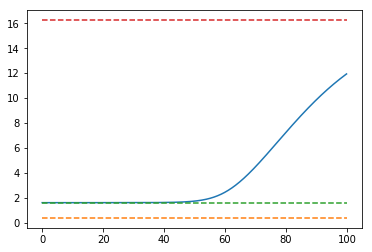

In [9]:
plt.plot(vrange,rnp[uval])
plt.plot([min(vrange),max(vrange)],[rminus,rminus],'--')
plt.plot([min(vrange),max(vrange)],[rplus,rplus],'--')
plt.plot([min(vrange),max(vrange)],[rcosm,rcosm],'--')
#plt.ylim(rcosm-.0000001,rcosm+.0000001)
#plt.ylim(rminus-.001,rminus+.001)
plt.show()

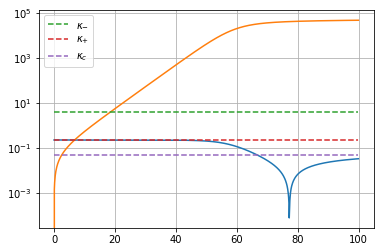

In [10]:
plt.plot(vrange2,np.abs(dsignpv[uval])/dercorr)
plt.plot(vrange2,np.abs(dsignpu[uval])/dercorr)
plt.plot([min(vrange2),max(vrange2)],[kappaminus,kappaminus],'--',label=r'$\kappa_{-}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappacosm,kappaminus-kappacosm],'--',label=r'$\kappa_{-}-\kappa_{c}$')
#plt.plot([min(vrange),max(vrange)],[kappaminus-kappaplus,kappaminus-kappaplus],'--',label=r'$\kappa_{-}-\kappa_{+}$')
plt.plot([min(vrange2),max(vrange2)],[kappaplus,kappaplus],'--',label=r'$\kappa_{+}$')
plt.plot([min(vrange2),max(vrange2)],[kappacosm,kappacosm],'--',label=r'$\kappa_{c}$')
#plt.plot([min(vrange),max(vrange)],[kappaplus-kappacosm,kappaplus-kappacosm],'--',label=r'$\kappa_{c}$')
plt.yscale('log')
#plt.ylim(-.11,-.09)
plt.ylim()
plt.legend(loc='best')
plt.grid()
plt.show()

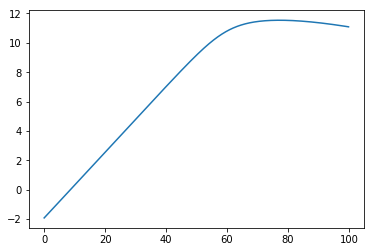

7049 1000
0.0 [-0.02185864 13.31650921]


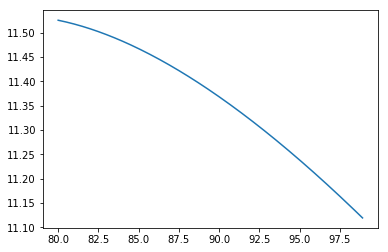

0.022471563810911074
0.0 0.050486562153118086 3.782071483719577
0.0 3.731584921566459


In [11]:
plt.plot(vrange2,signp[uval])
plt.show()
print(Nu,Nv)
vrange2=vrange*dr0v/0.5/np.abs(1-2*massnp[0][0]/rnp[0][0]+Q**2/rnp[0][0]**2-Lambda*(rnp[0][0])**2.0/3.0)
v1=Nv-200
v2=Nv-10
print(0.0,np.polyfit(vrange2[v1:v2],signp[uval][v1:v2],1.0))
plt.plot(vrange2[v1:v2],signp[uval][v1:v2])
plt.show()

print(np.abs(dsignpv[uval][int((v1+v2)/2)]))
print(0.0,kappacosm,kappaminus)
print(0.0,kappaminus-kappacosm)

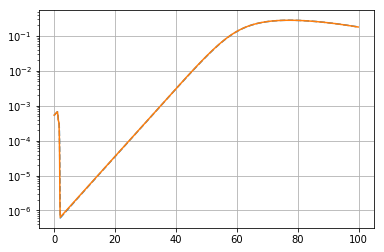

0 6.130035869068601e-07


In [12]:
#plt.plot(vrange2,np.abs(drnpu[uval])/dercorr)
#plt.plot(vrange2,drnpv[uval]/dercorr)
plt.plot(vrange2,np.abs(drnpv[uval])/dercorr,'--')
plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
plt.grid()
plt.show()

print(0,nanmin(drnpv[uval]))

0.0 [-0.03288234  1.56954691]


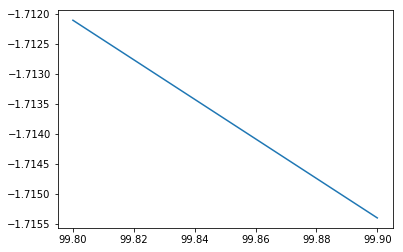

0.0 0.050486562153118086 0.22515797577088437 3.782071483719577


In [13]:
v1=Nv-2
v2=Nv-0
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(drnpv[uval][v1:v2]/dercorr)),1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(drnpv[uval][v1:v2])))
plt.show()
print(0.0,kappacosm,kappaplus,kappaminus)

0.0 7049


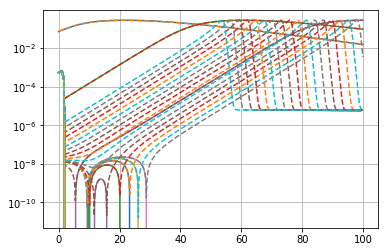

In [30]:
print(0.0,Nu)
numlines=20
for i in range(numlines):
    i=int(i*Nu/numlines)
    plt.plot(vrange2,drnpv[i]/dercorr)
    plt.plot(vrange2,np.abs(drnpv[i])/dercorr,'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
#plt.xlim(0,6)
plt.grid()
#plt.savefig('num-rel-pics/Tol=.0625_N=100_Nv=100.png',dpi=300)
plt.show()


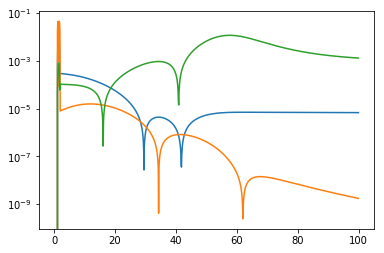

In [15]:
plt.plot(vrange2,np.abs(phinp[uval])/dercorr)
plt.plot(vrange2,np.abs(dphinpv[uval])/dercorr)
plt.plot(vrange2,np.abs(dphinpu[uval])/dercorr)
#plt.plot(vrange,dphinpv[0])
plt.yscale('log')
plt.show()

0.0 [ -0.06819036 -13.37150205]


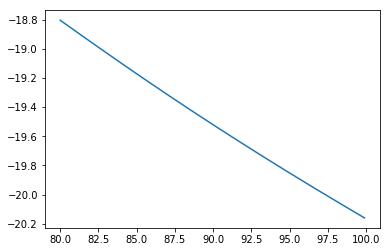

0.0 0.050486562153118086


In [16]:
v1=Nv-200
v2=Nv
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(dphinpv[uval][v1:v2]/dercorr)),1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(dphinpv[uval][v1:v2])))
plt.show()
print(0.0,kappacosm)

/home/brandon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


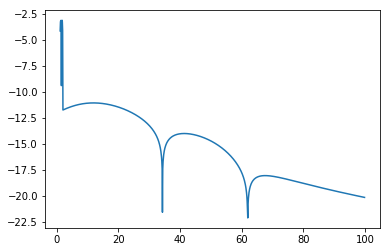

7049 1000
0.050486562153118086
[ 0.22177421 -1.85564643]


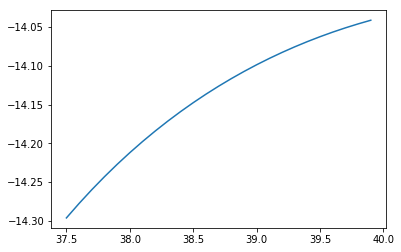

In [17]:
plt.plot(vrange,np.log(np.abs(dphinpv[uval])))
#plt.plot(vrange,dphinpv[0])
#plt.yscale('log')
plt.show()
print(Nu,Nv)
print(kappacosm)
v1=375
v2=400
print(np.polyfit(vrange2[v1:v2],signp[uval][v1:v2],1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(dphinpv[uval][v1:v2])))
plt.show()

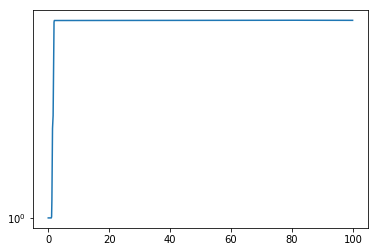

0 1000 3.782071483719577
0.0 [1.42511287e-08 1.20331152e-03]


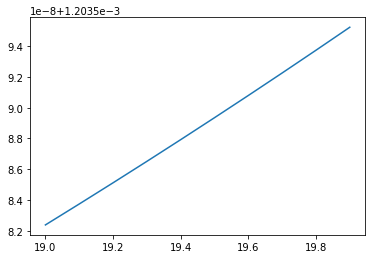

In [18]:
plt.plot(vrange2,np.abs(massnp[uval]))
#plt.ylim(massnp[uval,-1]-.00000000001,massnp[uval,-1]+.00000000001)
plt.yscale('log')
plt.show()
print(0,Nv,kappaminus)
v1=190
v2=200
print(0.0,np.polyfit(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])),1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(massnp[uval][v1:v2])))
plt.show()

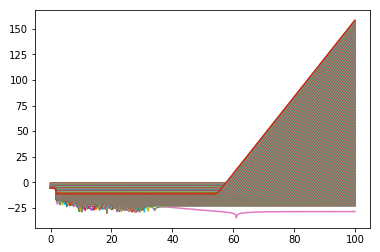

In [19]:
for i in range(int(Nu/10)):
    i2=10*i
    plt.plot(vrange,np.log(np.abs(np.exp(-signp[i2])*drnpv[i2])))
plt.show()


[  0.67015154 -42.10688079]


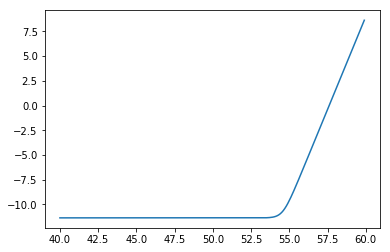

In [20]:
uval2=-1
v1=400
v2=600
print(np.polyfit(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])),1.0))
plt.plot(vrange2[v1:v2],np.log(np.abs(np.exp(-signp[uval2][v1:v2])*drnpv[uval2][v1:v2])))
plt.show()

In [21]:
print(massnp[0,-1])

1.0012042543447865


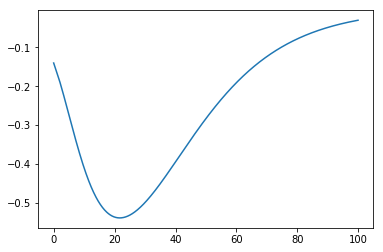

In [22]:
rnp2=rnp[0,-100]+10**(-15)*np.random.random(Nv)

dsignpv3=2*((massnp[0,-100]*rnp2-Q**2-1/3*Lambda*rnp2**4)/(rnp2**3-2*massnp[0,-100]*rnp2**2+Q**2*rnp2-Lambda/3*rnp2**5))*drnpv[0]
plt.plot(vrange,dsignpv3)
#plt.ylim(-1,1)
plt.show()
#print(dsignpv2)

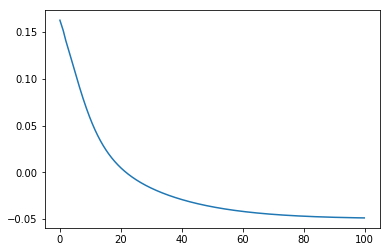

[ 1.62748602e-01  1.61773491e-01  1.60789823e-01  1.59797737e-01
  1.58797378e-01  1.57788898e-01  1.56772453e-01  1.55748208e-01
  1.54716333e-01  1.53677001e-01  1.52630396e-01  1.51563450e-01
  1.50328785e-01  1.48883161e-01  1.47525945e-01  1.46407467e-01
  1.45284949e-01  1.43933896e-01  1.42515277e-01  1.41295806e-01
  1.40217010e-01  1.39144302e-01  1.38066387e-01  1.36983508e-01
  1.35895913e-01  1.34803849e-01  1.33707570e-01  1.32607329e-01
  1.31503382e-01  1.30395986e-01  1.29285401e-01  1.28171886e-01
  1.27055704e-01  1.25937115e-01  1.24816382e-01  1.23693767e-01
  1.22569533e-01  1.21443941e-01  1.20317254e-01  1.19189730e-01
  1.18061630e-01  1.16933212e-01  1.15804731e-01  1.14676443e-01
  1.13548600e-01  1.12421451e-01  1.11295246e-01  1.10170227e-01
  1.09046637e-01  1.07924716e-01  1.06804697e-01  1.05686814e-01
  1.04571293e-01  1.03458359e-01  1.02348233e-01  1.01241129e-01
  1.00137260e-01  9.90368317e-02  9.79400474e-02  9.68471042e-02
  9.57581949e-02  9.46735

In [23]:
dsignpv2=2*((massnp[0,0]*rnp[0]-Q**2-1/3*Lambda*rnp[0]**4)/(rnp[0]**3-2*massnp[0,0]*rnp[0]**2+Q**2*rnp[0]-Lambda/3*rnp[0]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
plt.show()
print(dsignpv2)

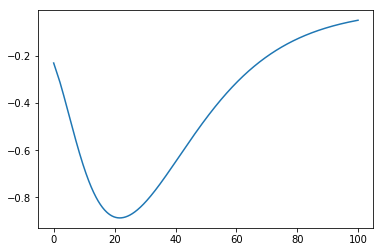

[-0.23041248 -0.23420034 -0.23802704 -0.24189225 -0.2457956  -0.24973672
 -0.25371521 -0.25773065 -0.26178258 -0.26587053 -0.269994   -0.27412842
 -0.27799571 -0.28148399 -0.28514092 -0.28928169 -0.2934524  -0.29718239
 -0.30077108 -0.30478637 -0.30913535 -0.31353743 -0.31796711 -0.32242364
 -0.32690625 -0.33141417 -0.3359466  -0.34050274 -0.34508174 -0.34968278
 -0.354305   -0.35894752 -0.36360945 -0.36828992 -0.372988   -0.37770279
 -0.38243335 -0.38717874 -0.39193803 -0.39671025 -0.40149446 -0.40628968
 -0.41109494 -0.41590926 -0.42073168 -0.4255612  -0.43039684 -0.43523762
 -0.44008256 -0.44493066 -0.44978094 -0.45463242 -0.45948413 -0.46433508
 -0.4691843  -0.47403083 -0.47887371 -0.48371197 -0.48854468 -0.49337089
 -0.49818967 -0.50300009 -0.50780125 -0.51259223 -0.51737214 -0.5221401
 -0.52689524 -0.5316367  -0.53636364 -0.5410752  -0.54577059 -0.55044898
 -0.55510959 -0.55975163 -0.56437435 -0.56897699 -0.57355882 -0.57811911
 -0.58265717 -0.58717231 -0.59166385 -0.59613114 -0.

In [24]:
massnp2=massnp[0,-1]+10**(-19)*np.random.random(Nv)

dsignpv2=2*((massnp2*rnp[0,-1]-Q**2-1/3*Lambda*rnp[0,-1]**4)/(rnp[0,-1]**3-2*massnp2*rnp[0,-1]**2+Q**2*rnp[0,-1]-Lambda/3*rnp[0,-1]**5))*drnpv[0]
plt.plot(vrange,dsignpv2)
#plt.ylim(-.12,-.09)
plt.show()
print(dsignpv2)

In [25]:
Rfunc=-drnpv[uval]*drnpu[uval]/rnp[uval]-np.exp(signp[uval])/(4.0*rnp[uval])*(1.0-np.power((Q/rnp[uval]),2.0)-Lambda*np.power(rnp[uval],2.0))

0.0 7049


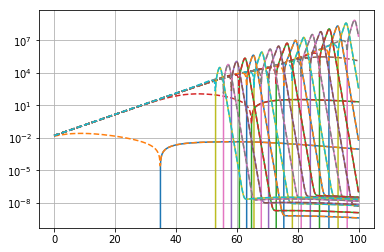

In [26]:
print(0.0,Nu)
numlines=20
for i in range(numlines):
    i=int(i*Nu/numlines)
    Rfunc=-drnpv[uval]*drnpu[i]/rnp[i]-np.exp(signp[i])/(4.0*rnp[i])*(1.0-np.power((Q/rnp[i]),2.0)-Lambda*np.power(rnp[i],2.0))
    plt.plot(vrange2,Rfunc/dercorr)
    plt.plot(vrange2,np.abs(Rfunc)/dercorr,'--')
    #plt.plot(vrange2[0:Nv-1],np.abs(np.diff(rnp[uval])/np.diff(vrange2)))
plt.yscale('log')
plt.grid()
plt.show()
#plt.plot(vrange2,Rfunc)
#plt.plot(vrange2,np.abs(Rfunc),'--')
#plt.yscale('log')
#plt.show()

In [27]:
r2=1.56
print(1-Q**2.0/r2**2.0-Lambda*r2**2.0)

0.7126791216305062


In [28]:
print(urange)

[0.01971708 0.12809416 0.23451796 ... 5.16646319 5.16646337 5.16646355]
